# Perceptron Learning Algorithm

In [105]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# 在 jupyter notebook 中加這行就可以省略 plt.show()
%matplotlib inline

## Iris flower dataset

In [97]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print('target_names:' + str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x, y], axis=1)
iris_data.head()

target_names:['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [98]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


建立一個新欄位 target_name 利用 map() 對應 target 欄位來決定是哪一種花。
然後只選出 setosa 和 versicolor 來看。
建立一個新表格，只利用 sepal 和 petal 的長度和 target_name。

In [99]:
target_name = {0:'setosa', 1:'versicolor', 2:'virginica'}
iris_data['target_name'] = iris_data['target'].map(target_name)
iris_data = iris_data[(iris_data['target_name'] == 'setosa') | (iris_data['target_name'] == 'versicolor')]
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target_name']]
iris_data.head()

,sepal length (cm),petal length (cm),target_name
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


要用 PLA 所以用 map() 把 setosa 定為 +1 把 versicolor 定為 -1。
target_name 欄位就不需要了，所以丟掉

In [100]:
target_class = {'setosa':1, 'versicolor':-1}
iris_data['target_class'] = iris_data['target_name'].map(target_class)
del iris_data['target_name']
iris_data.head()

,sepal length (cm),petal length (cm),target_class
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1


定義 Activation function (激勵函數)

In [101]:
def sign(z):
    if z > 0:
        return 1
    else:
        return -1

測試畫圖

[1.  5.1 1.4]
<class 'numpy.ndarray'>
1.0
<class 'numpy.float64'>


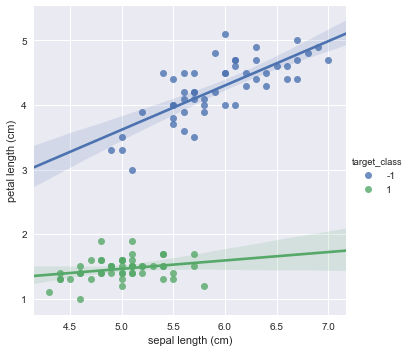

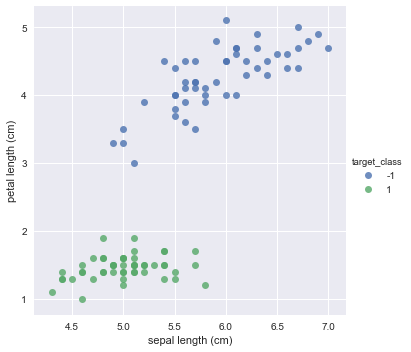

In [102]:
x = np.append([1], iris_data.iloc[0][:2].values) # 第一個數是 x0=1
print(x)
print(type(x))
y = iris_data.iloc[0][2]
print(y)
print(type(y))

plt.style.use('seaborn')
sns.lmplot(x='sepal length (cm)', y='petal length (cm)', 
           data=iris_data, hue='target_class')

sns.lmplot(x='sepal length (cm)', y='petal length (cm)', 
           data=iris_data, hue='target_class', fit_reg=False)

只有兩個特徵 sepal length (當 x1) 和 petal length (當x2)。
方程式是：w0x0 + w1x1 + w2x2 > 0
設定初始 w = [0, 0, 0]

iterator: 0
原本的 w: [0. 0. 0.]
現在的 x: [1.  5.1 1.4]
現在的 y: 1.0
新的 w: [1.  5.1 1.4]


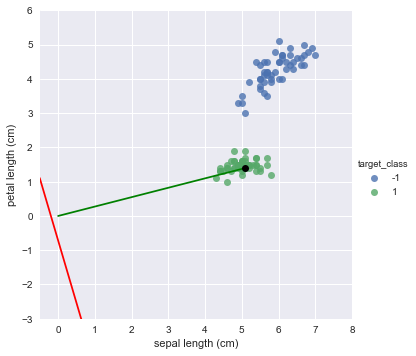

iterator: 1
原本的 w: [1.  5.1 1.4]
現在的 x: [1.  7.  4.7]
現在的 y: -1.0
新的 w: [ 0.  -1.9 -3.3]


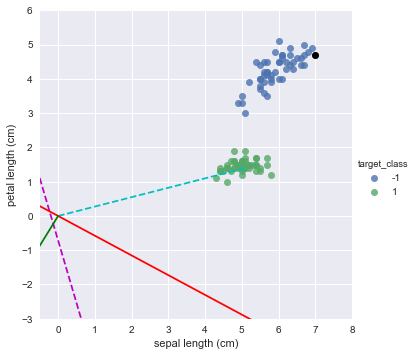

iterator: 2
原本的 w: [ 0.  -1.9 -3.3]
現在的 x: [1.  5.1 1.4]
現在的 y: 1.0
新的 w: [ 1.   3.2 -1.9]


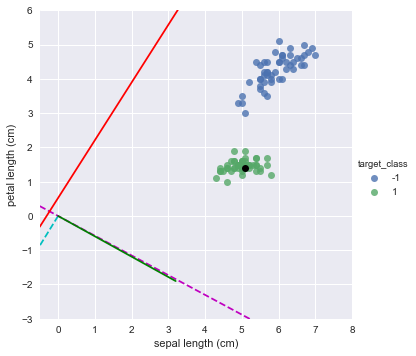

iterator: 3
原本的 w: [ 1.   3.2 -1.9]
現在的 x: [1.  7.  4.7]
現在的 y: -1.0
新的 w: [ 0.  -3.8 -6.6]


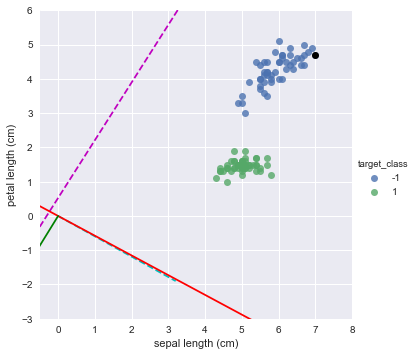

iterator: 4
原本的 w: [ 0.  -3.8 -6.6]
現在的 x: [1.  5.1 1.4]
現在的 y: 1.0
新的 w: [ 1.   1.3 -5.2]


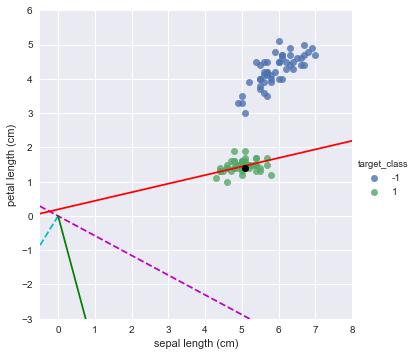

iterator: 5
原本的 w: [ 1.   1.3 -5.2]
現在的 x: [1.  4.6 1.5]
現在的 y: 1.0
新的 w: [ 2.   5.9 -3.7]


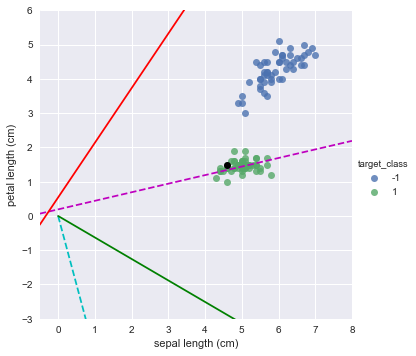

iterator: 6
原本的 w: [ 2.   5.9 -3.7]
現在的 x: [1.  7.  4.7]
現在的 y: -1.0
新的 w: [ 1.  -1.1 -8.4]


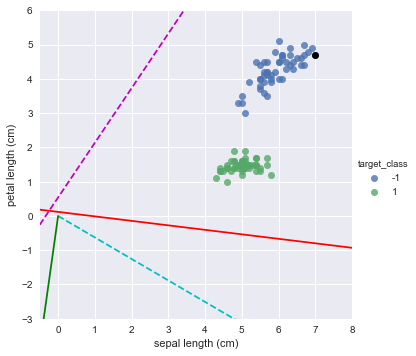

iterator: 7
原本的 w: [ 1.  -1.1 -8.4]
現在的 x: [1.  5.1 1.4]
現在的 y: 1.0
新的 w: [ 2.  4. -7.]


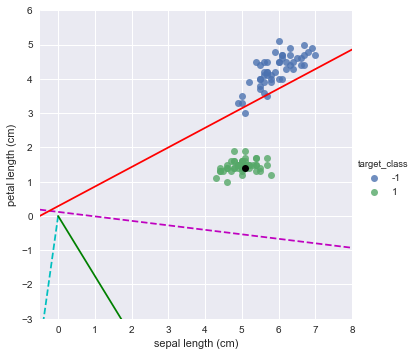

iterator: 8
原本的 w: [ 2.  4. -7.]
現在的 x: [1.  5.7 3.5]
現在的 y: -1.0
新的 w: [  1.   -1.7 -10.5]


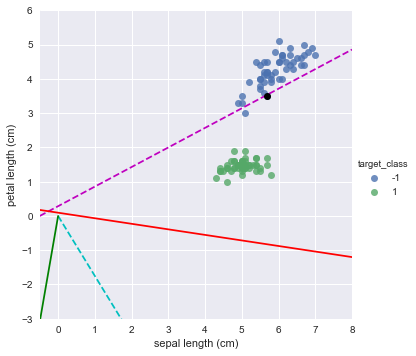

iterator: 9
原本的 w: [  1.   -1.7 -10.5]
現在的 x: [1.  5.1 1.4]
現在的 y: 1.0
新的 w: [ 2.   3.4 -9.1]


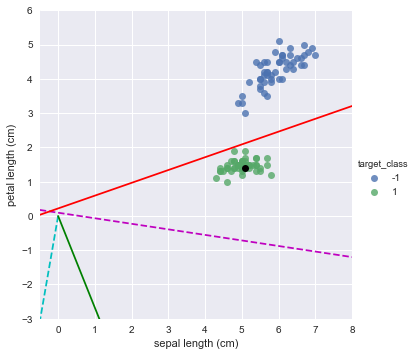

In [103]:
w = np.array([0.,0.,0.])
error = 1
iterator = 0

while error != 0:
    error = 0
    for i in range(len(iris_data)):
        x, y = np.append([1], iris_data.iloc[i][:2].values), iris_data.iloc[i][2]

        if sign(w.dot(x)) != y:
            print('iterator: {}'.format(iterator))
            print('原本的 w: {}'.format(w))
            print('現在的 x: {}'.format(x))
            print('現在的 y: {}'.format(y))

            iterator += 1
            error += 1

            sns.lmplot(x='sepal length (cm)', y='petal length (cm)', 
                       data=iris_data, hue='target_class', fit_reg=False)    
            
            # 前一個Decision boundary 的法向量
            if w[1] != 0:
                x_last_decision_boundary = np.linspace(0,w[1])
                y_last_decision_boundary = (w[2]/w[1])*x_last_decision_boundary
                plt.plot(x_last_decision_boundary, y_last_decision_boundary,'c--')
            # 前一個 Decision boundary 的線
            if w[2] != 0:
                x_last = np.linspace(-0.5, 8)
                y_last = (-w[1]/w[2])*x_last - (w[0]/w[2])
                plt.plot(x_last, y_last, 'm--')
                
            w += y*x
            print('新的 w: {}'.format(w))
            
            # 直線方程式：ax + by = c
            # 法線向量: (a, b)
            # 方向向量:(b, -a) 或 (-b, a)
            
            # Decision boundry 的方程式 w0x0 + w1x1 + w2x2 = 0
            # x0 = 1, x1 就帶 x 軸的範圍
            # x2 = -(w0/w2)x0 - (w1/w2)x1 這就是直線方程的 y
            x_decision_boundary = np.linspace(-0.5,8)
            y_decision_boundary = (-w[1]/w[2])*x_decision_boundary - (w[0]/w[2])
            plt.plot(x_decision_boundary, y_decision_boundary,'r')
            
            # Decision boundary 的法向量是 (w1, w2)
            # 要畫一條線 y=ax+b 通過 (0, 0) 和 (w1, w2)
            # 帶入兩個點得 a=w2/w1, b=0
            x_decision_boundary_normal_vector = np.linspace(0,w[1])
            y_decision_boundary_normal_vector = (w[2]/w[1])*x_decision_boundary_normal_vector
            plt.plot(x_decision_boundary_normal_vector, y_decision_boundary_normal_vector,'g')
            # (有畫上法線的那側會被判斷為 +1)
            
            # x向量 
            #x_vector = np.linspace(0,x[1])
            #y_vector = (x[2]/x[1])*x_vector
            #plt.plot(x_vector, y_vector,'b')
            # 發生錯誤預測的點
            plt.plot(x[1], x[2], 'ko')
            
            plt.xlim(-0.5,8)
            plt.ylim(-3,6)
            plt.show()